In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
%matplotlib inline
pd.set_option("display.max.columns", None)

In [25]:
cdc_data_df = pd.read_csv('/Users/kevinmarlis/Developer/Thesis/Data Sources/500 Cities/500_Cities_labels.csv')
cdc_data_df = cdc_data_df.drop(['Unnamed: 0'], axis=1)
cdc_data_df = cdc_data_df.rename(columns={'TractFIPS': 'CensusTract'})

In [26]:
hpi_data_df = pd.read_csv('/Users/kevinmarlis/Developer/Thesis/Data Sources/Healthy Places Index/HPI_labels.csv')
hpi_data_df = hpi_data_df.drop(['Unnamed: 0'], axis=1)

In [27]:
print(cdc_data_df.shape)
cdc_data_df.head()

(1746, 5)


,CensusTract,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,COPD_CrudePrev
0,6037480302,5.4,7.4,4.8,4.1
1,6037480303,3.9,7.2,3.8,3.4
2,6037480304,4.7,7.5,5.7,4.6
3,6037480400,6.0,7.1,4.5,3.6
4,6037480802,5.4,7.3,5.2,4.1


In [28]:
print(hpi_data_df.shape)
hpi_data_df.head()

(2346, 5)


,CensusTract,ozone,pm25,dieselpm,h20contam
0,6037101110,0.055122,11.21,4.579248,618.051447
1,6037101122,0.055122,11.21,3.373877,616.698272
2,6037101210,0.053109,11.21,7.327438,618.051447
3,6037101220,0.053109,11.21,9.080922,618.051447
4,6037101300,0.053109,11.21,8.023887,849.099344


In [30]:
cdc_tracts = list(cdc_data_df['CensusTract'])
hpi_tracts = list(hpi_data_df['CensusTract'])
cdc_tracts_not_in_hpi = [tract for tract in cdc_tracts if tract not in hpi_tracts]
hpi_tracts_not_in_cdc = [tract for tract in hpi_tracts if tract not in cdc_tracts]
len(hpi_tracts_not_in_cdc)

606

In [34]:
combined_data_df = cdc_data_df.merge(hpi_data_df, on='CensusTract')
combined_data_df = combined_data_df[['CensusTract', 'ozone', 'pm25', 'dieselpm', 'h20contam', 'CANCER_CrudePrev', 'CASTHMA_CrudePrev', 'CHD_CrudePrev', 'COPD_CrudePrev']]

In [35]:
print(combined_data_df.shape)
combined_data_df.head()

(1746, 9)


,CensusTract,ozone,pm25,dieselpm,h20contam,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,COPD_CrudePrev
0,6037480302,0.051243,11.21,22.658533,857.966964,5.4,7.4,4.8,4.1
1,6037480303,0.049512,11.21,22.700000,862.362173,3.9,7.2,3.8,3.4
2,6037480304,0.049512,11.21,22.700000,862.362173,4.7,7.5,5.7,4.6
3,6037480400,0.051243,11.21,22.313068,855.975553,6.0,7.1,4.5,3.6
4,6037480802,0.049512,11.63,22.700000,1100.451859,5.4,7.3,5.2,4.1


In [63]:
correlation = combined_data_df.corr().abs()

In [64]:
correlation = correlation.drop(correlation.index[[0,5,6,7,8]])
correlation = correlation.drop(correlation.columns[[0,1,2,3,4]], axis=1)
correlation

,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,COPD_CrudePrev
ozone,0.142911,0.088477,0.025366,0.038274
pm25,0.157218,0.076292,0.008824,0.109562
dieselpm,0.244448,0.064324,0.049920,0.061158
h20contam,0.037919,0.113350,0.054218,0.007794


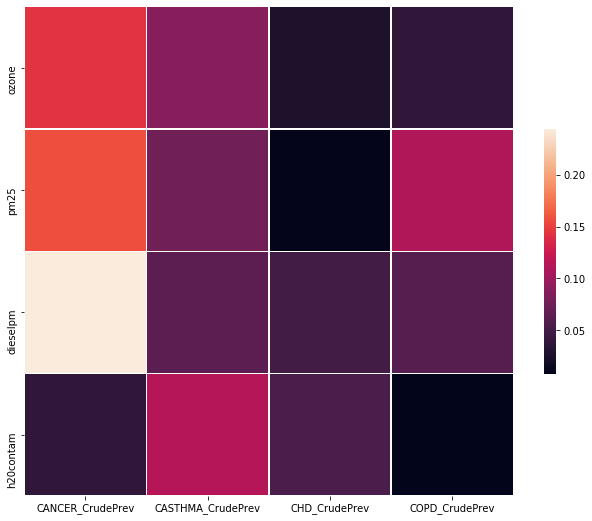

In [69]:
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(correlation,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
from sodapy import Socrata

In [82]:
cdc_domain = 'chronicdata.cdc.gov'
cdc_identifier = 'k86t-wghb'

In [ ]:
client =  Socrata(cdc_domain, None)

In [163]:
metadata = client.get_metadata(cdc_identifier)
[x['name'] for x in metadata['columns'] if '95CI'not in x['name']]

['StateAbbr',
 'PlaceName',
 'PlaceFIPS',
 'TractFIPS',
 'Place_TractID',
 'Population2010',
 'ACCESS2_CrudePrev',
 'ARTHRITIS_CrudePrev',
 'BINGE_CrudePrev',
 'BPHIGH_CrudePrev',
 'BPMED_CrudePrev',
 'CANCER_CrudePrev',
 'CASTHMA_CrudePrev',
 'CHD_CrudePrev',
 'CHECKUP_CrudePrev',
 'CHOLSCREEN_CrudePrev',
 'COLON_SCREEN_CrudePrev',
 'COPD_CrudePrev',
 'COREM_CrudePrev',
 'COREW_CrudePrev',
 'CSMOKING_CrudePrev',
 'DENTAL_CrudePrev',
 'DIABETES_CrudePrev',
 'HIGHCHOL_CrudePrev',
 'KIDNEY_CrudePrev',
 'LPA_CrudePrev',
 'MAMMOUSE_CrudePrev',
 'MHLTH_CrudePrev',
 'OBESITY_CrudePrev',
 'PAPTEST_CrudePrev',
 'PHLTH_CrudePrev',
 'SLEEP_CrudePrev',
 'STROKE_CrudePrev',
 'TEETHLOST_CrudePrev',
 'Geolocation']

In [164]:
meta_tract = [x for x in metadata['columns'] if x['name'] == 'TractFIPS'][0]
meta_tract

{'id': 333200547,
 'name': 'TractFIPS',
 'dataTypeName': 'text',
 'description': 'Tract FIPS code',
 'fieldName': 'tractfips',
 'position': 4,
 'renderTypeName': 'text',
 'tableColumnId': 39940640,
 'width': 76,
 'cachedContents': {'largest': '56021002000',
  'non_null': '27210',
  'null': '0',
  'top': [{'item': '48157670700', 'count': '3'},
   {'item': '06059099203', 'count': '3'},
   {'item': '06059075813', 'count': '2'},
   {'item': '06059110201', 'count': '2'},
   {'item': '06059088901', 'count': '2'},
   {'item': '16001010321', 'count': '2'},
   {'item': '08001060000', 'count': '2'},
   {'item': '06073019303', 'count': '2'},
   {'item': '06059089104', 'count': '2'},
   {'item': '13121009802', 'count': '2'},
   {'item': '06073019805', 'count': '2'},
   {'item': '06059099702', 'count': '2'},
   {'item': '48113018129', 'count': '2'},
   {'item': '06059075806', 'count': '2'},
   {'item': '48201423600', 'count': '2'},
   {'item': '41051010200', 'count': '2'},
   {'item': '06059099241'

In [174]:
results = client.get(cdc_identifier, where="tractfips LIKE '06037%'", limit=2000)

In [175]:
cdc_df = pd.DataFrame.from_dict(results)
cdc_df

,stateabbr,placename,placefips,tractfips,place_tractid,population2010,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,binge_crudeprev,binge_crude95ci,bphigh_crudeprev,bphigh_crude95ci,bpmed_crudeprev,bpmed_crude95ci,cancer_crudeprev,cancer_crude95ci,casthma_crudeprev,casthma_crude95ci,chd_crudeprev,chd_crude95ci,checkup_crudeprev,checkup_crude95ci,cholscreen_crudeprev,cholscreen_crude95ci,colon_screen_crudeprev,colon_screen_crude95ci,copd_crudeprev,copd_crude95ci,corem_crudeprev,corem_crude95ci,corew_crudeprev,corew_crude95ci,csmoking_crudeprev,csmoking_crude95ci,dental_crudeprev,dental_crude95ci,diabetes_crudeprev,diabetes_crude95ci,highchol_crudeprev,highchol_crude95ci,kidney_crudeprev,kidney_crude95ci,lpa_crudeprev,lpa_crude95ci,mammouse_crudeprev,mammouse_crude95ci,mhlth_crudeprev,mhlth_crude95ci,obesity_crudeprev,obesity_crude95ci,paptest_crudeprev,paptest_crude95ci,phlth_crudeprev,phlth_crude95ci,sleep_crudeprev,sleep_crude95ci,stroke_crudeprev,stroke_crude95ci,teethlost_crudeprev,teethlost_crude95ci,geolocation
0,CA,Alhambra,0600884,06037480302,0600884-06037480302,4255,12.7,"(10.7, 15.0)",16.6,"(15.9, 17.3)",14.5,"(14.2, 14.9)",25.9,"(25.0, 26.6)",71.5,"(70.6, 72.4)",5.4,"( 5.3, 5.6)",7.4,"( 7.1, 7.8)",4.8,"( 4.4, 5.2)",68.8,"(68.3, 69.3)",82.8,"(81.5, 84.0)",61.9,"(58.9, 64.7)",4.1,"( 3.6, 4.6)",27.0,"(23.7, 30.7)",33.5,"(30.2, 36.9)",11.1,"( 9.6, 12.6)",63.8,"(60.5, 67.0)",10.7,"(10.0, 11.3)",33.3,"(32.6, 33.9)",2.9,"( 2.8, 3.1)",20.7,"(18.9, 22.4)",78.9,"(76.1, 81.2)",10.0,"( 9.2, 10.8)",18.7,"(18.0, 19.3)",81.6,"(79.4, 83.8)",10.5,"( 9.5, 11.4)",36.5,"(35.4, 37.7)",2.7,"( 2.4, 2.9)",8.5,"( 6.0, 11.1)","(34.10124490310, -118.121802023)"
1,CA,Alhambra,0600884,06037480303,0600884-06037480303,3858,14.4,"(12.0, 16.9)",13.2,"(12.6, 13.9)",14.2,"(13.8, 14.6)",22.8,"(21.9, 23.8)",67.1,"(66.0, 68.2)",3.9,"( 3.8, 4.1)",7.2,"( 6.8, 7.7)",3.8,"( 3.5, 4.1)",66.3,"(65.6, 67.0)",79.9,"(78.3, 81.6)",54.8,"(51.4, 58.0)",3.4,"( 3.0, 3.8)",23.8,"(20.0, 27.5)",30.7,"(27.4, 34.5)",12.0,"(10.0, 13.9)",57.6,"(53.7, 61.4)",10.1,"( 9.5, 10.8)",30.5,"(29.7, 31.2)",2.6,"( 2.5, 2.8)",22.1,"(19.8, 24.2)",78.0,"(74.8, 80.8)",10.7,"( 9.6, 11.8)",18.7,"(17.8, 19.6)",79.8,"(77.1, 82.1)",10.2,"( 9.2, 11.3)",39.6,"(38.2, 41.1)",2.3,"( 2.0, 2.5)",9.7,"( 6.8, 13.0)","(34.09514214870, -118.137717692)"
2,CA,Alhambra,0600884,06037480304,0600884-06037480304,4098,15.8,"(13.3, 18.5)",16.4,"(15.6, 17.3)",11.9,"(11.6, 12.3)",27.9,"(26.9, 28.9)",72.7,"(71.7, 73.7)",4.7,"( 4.5, 4.8)",7.5,"( 7.1, 8.0)",5.7,"( 5.1, 6.2)",68.2,"(67.5, 68.8)",79.2,"(77.6, 80.9)",54.1,"(50.2, 57.8)",4.6,"( 4.0, 5.2)",22.9,"(18.5, 27.3)",28.9,"(24.7, 33.3)",13.8,"(11.9, 15.8)",54.9,"(51.1, 59.0)",13.3,"(12.3, 14.2)",34.5,"(33.6, 35.3)",3.4,"( 3.2, 3.7)",26.2,"(23.9, 28.5)",76.6,"(72.6, 79.8)",11.7,"(10.7, 12.9)",18.7,"(18.0, 19.4)",77.8,"(74.5, 80.9)",12.6,"(11.5, 13.9)",39.9,"(38.5, 41.2)",3.3,"( 3.0, 3.7)",11.7,"( 7.6, 16.5)","(34.09616768520, -118.131602046)"
3,CA,Alhambra,0600884,06037480400,0600884-06037480400,5654,9.9,"( 8.3, 11.7)",16.6,"(15.8, 17.4)",14.5,"(14.2, 14.8)",25.1,"(24.2, 25.9)",72.3,"(71.4, 73.2)",6.0,"( 5.7, 6.2)",7.1,"( 6.8, 7.4)",4.5,"( 4.1, 5.0)",69.7,"(69.3, 70.2)",84.9,"(83.8, 85.9)",64.6,"(61.9, 67.0)",3.6,"( 3.1, 4.2)",29.7,"(26.1, 33.0)",35.5,"(32.0, 39.0)",8.8,"( 7.4, 10.2)",68.7,"(66.1, 71.2)",9.6,"( 9.0, 10.3)",32.9,"(32.3, 33.6)",2.8,"( 2.6, 3.0)",17.8,"(16.0, 19.3)",79.6,"(77.3, 81.6)",8.7,"( 7.9, 9.4)",17.4,"(16.7, 18.0)",82.5,"(80.5, 84.3)",9.1,"( 8.2, 10.1)",35.0,"(33.9, 36.2)",2.4,"( 2.2, 2.7)",6.9,"( 4.5, 10.6)","(34.10399968980, -118.132169594)"
4,CA,Alhambra,0600884,06037480802,0600884-06037480802,3279,16.4,"(13.8, 19.1)",17.0,"(16.2, 17.8)",14.7,"(14.3, 15.2)",27.1,"(26.2, 27.9)",71.6,"(70.7, 72.6)",5.4,"( 5.2, 5.6)",7.3,"( 6.9, 7.8)",5.2,"( 4.8, 5.6)",69.0,"(68.4, 69.6)",83.1,"(81.8, 84.4)",60.3,"(56.8, 63.3)",4.1,"( 3.6, 4.6)",25.5,"(22.0, 29.2)",31.7,"(28.0, 35.2)",11.2,"( 9.7, 12.6)",61.4,"(57.6, 65.0)",12.1,"(1

In [176]:
cdc_tracts = list(cdc_df['tractfips'])

In [136]:
from arcgis.gis import GIS
from arcgis.features import FeatureLayer

In [195]:
data_url = 'https://services1.arcgis.com/PCHfdHz4GlDNAhBb/arcgis/rest/services/CES3FINAL_AGOL/FeatureServer/1'
data_layer = FeatureLayer(data_url)
all_features = data_layer.query()


In [196]:
ces_df = all_features.sdf

In [197]:
ces_df

,OBJECTID,L0CalEnviroScreen_3_0_Tractdbl,L0CalEnviroScreen_3_0_TractArea,L0CalEnviroScreen_3_0_OBJECTID_,L0CalEnviroScreen_3_0_tract,L0CalEnviroScreen_3_0_pop2010,L0CalEnviroScreen_3_0_CIscore,L0CalEnviroScreen_3_0_CIscoreP,L0CalEnviroScreen_3_0_ozone,L0CalEnviroScreen_3_0_ozoneP,L0CalEnviroScreen_3_0_pm,L0CalEnviroScreen_3_0_pmP,L0CalEnviroScreen_3_0_diesel,L0CalEnviroScreen_3_0_dieselP,L0CalEnviroScreen_3_0_pest,L0CalEnviroScreen_3_0_pestP,L0CalEnviroScreen_3_0_RSEIhaz,L0CalEnviroScreen_3_0_RSEIhazP,L0CalEnviroScreen_3_0_traffic,L0CalEnviroScreen_3_0_trafficP,L0CalEnviroScreen_3_0_drink,L0CalEnviroScreen_3_0_drinkP,L0CalEnviroScreen_3_0_cleanups,L0CalEnviroScreen_3_0_cleanupsP,L0CalEnviroScreen_3_0_gwthreats,L0CalEnviroScreen_3_0_gwthrea_1,L0CalEnviroScreen_3_0_haz,L0CalEnviroScreen_3_0_hazP,L0CalEnviroScreen_3_0_iwb,L0CalEnviroScreen_3_0_iwbP,L0CalEnviroScreen_3_0_swis,L0CalEnviroScreen_3_0_swisP,L0CalEnviroScreen_3_0_Pollution,L0CalEnviroScreen_3_0_Polluti_1,L0CalEnviroScreen_3_0_Polluti_2,L0CalEnviroScreen_3_0_asthma,L0CalEnviroScreen_3_0_asthmaP,L0CalEnviroScreen_3_0_lbw,L0CalEnviroScreen_3_0_lbwP,L0CalEnviroScreen_3_0_cvd,L0CalEnviroScreen_3_0_cvdP,L0CalEnviroScreen_3_0_edu,L0CalEnviroScreen_3_0_eduP,L0CalEnviroScreen_3_0_ling,L0CalEnviroScreen_3_0_lingP,L0CalEnviroScreen_3_0_pov,L0CalEnviroScreen_3_0_povP,L0CalEnviroScreen_3_0_unemp,L0CalEnviroScreen_3_0_unempP,L0CalEnviroScreen_3_0_housingB,L0CalEnviroScreen_3_0_housingBP,L0CalEnviroScreen_3_0_PopChar,L0CalEnviroScreen_3_0_PopCharSc,L0CalEnviroScreen_3_0_PopCharP,L0CalEnviroScreen_3_0_Children_,L0CalEnviroScreen_3_0_AVGchildr,L0CalEnviroScreen_3_0_Pop_11_64,L0CalEnviroScreen_3_0_Elderly__,L0CalEnviroScreen_3_0_AVGeldPCT,L0CalEnviroScreen_3_0_Hispanic_,L0CalEnviroScreen_3_0_White____,L0CalEnviroScreen_3_0_African_A,L0CalEnviroScreen_3_0_Native_Am,L0CalEnviroScreen_3_0_Asian_Ame,L0CalEnviroScreen_3_0_Other____,L0CalEnviroScreen_3_0_Shape__Ar,L0CalEnviroScreen_3_0_Shape__Le,L0CalEnviroScreen_3_0_PCTLrange,L0CalEnviroScreen_3_0_CIgroupsR,L0CalEnviroScreen_3_0_PMpTXT,L0CalEnviroScreen_3_0_TraffpTXT,L0CalEnviroScreen_3_0_DrinkpTXT,L0CalEnviroScreen_3_0_LBWpTXT,L0CalEnviroScreen_3_0_EdupTXT,L0CalEnviroScreen_3_0_LingpTXT,L0CalEnviroScreen_3_0_PovpTXT,L0CalEnviroScreen_3_0_UnemppTXT,L0CalEnviroScreen_3_0_HBpTXT,CES2018Update_DecileVigintile_O,CES2018Update_DecileVigintile_t,CES2018Update_DecileVigintile_C,CES2018Update_DecileVigintile_1,CES2018Update_DecileVigintile_D,CES2018Update_changingcolumns_O,CES2018Update_changingcolumns_t,CES2018Update_changingcolumns_C,CES2018Update_changingcolumns_1,CES2018Update_changingcolumns_2,CES2018Update_changingcolumns_P,CES2018Update_changingcolumns_3,Shape__Area,Shape__Length,TractTXT,TractINT,SHAPE
0,1,6083002103,2.847611,5303,6083002103,3930,29.509728,58.519359,0.035258,16.938395,4.506147,1.858782,16.790000,51.064095,3205.175095,94.806094,38.701857,16.612622,539.46,34.954255,284.326906,29.736809,1.00,17.967895,30.25,81.926514,1.250,88.767377,7,71.611762,0.00,0.000000,40.777384,5.022602,46.944617,58.41,67.198604,4.65,42.624632,6.75,33.886049,24.8,69.846076,12.0,66.017864,62.0,86.247643,7.3,32.097982,23.7,72.810358,56.653540,5.875386,59.982343,16.4,13.02,70.5,13.1,12.02,57.5,31.3,1.9,0.5,7.2,1.6,2.847611e+06,6999.357622,56 - 60%,5.0,2,35,30,43,70,66,86,32,73,4695,6083002103,6.0,12.0,5.0,3788,6083002103,29.51,59.0,55-60%,47,60.0,2.847611e+06,6999.357689,6.083e+009 ...,None,"{""rings"": [[[-39795.0700999983, -341919.1909],..."
1,2,6083002402,16.352920,1301,6083002402,11406,33.173118,65.254130,0.035258,16.938395,4.506147,1.858782,12.876551,38.282514,26775.744180,99.342105,40.935116,17.036667,370.37,18.210302,548.416079,57.315704,14.70,76.322510,199.10,99.321417,5.025,96.515292,8,76.387354,10.00,89.460033,52.913247,6.517423,79.489732,36.71,36.703653,4.16,29.834679,3.42,1.845156,46.0,91.723442,16.9,78.736169,56.7,81.005657,10.6,60.553370,21.4,64.813404,49.080452,5.089914,48.682053,20.6,13.02,73.2,6.2,12.02,74.0,17.4,1.4,0.2,5.5,1.6,1.635292e+0

In [203]:
lac_census_tracts = ['0' + str(x) for x in list(ces_df['L0CalEnviroScreen_3_0_tract']) if str(x)[:4] == '6037']
len(lac_census_tracts)

2343

In [204]:
lac_cdc_tracts = [x for x in cdc_tracts if x[:5] == '06037']
len(lac_cdc_tracts)

1746

In [205]:
union_tracts = list(set(lac_census_tracts) & set(cdc_tracts))
len(union_tracts)

1740